In [13]:
import nltk
import re
import random
import pandas as pd
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag, ne_chunk

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

In [14]:
path=r"C:\Users\User\Desktop\BSE\SEM 6\Natural Language Processing\Assignment\testing.xlsx"
df=pd.read_excel(path)
df.head()

,Tag,Patterns,Responses
0,Happy,['I'm feeling happy today! Everything seems to...,[I'm glad you're feeling happy! Can you tell m...
1,Sad,"['I'm feeling a bit down today, like a heavy c...",[I'm sorry to hear that you're feeling sad. Do...
2,Depress,"['I've been feeling depressed lately, like I'm...",[I'm here for you if you're feeling depressed....
3,Angry,"[I'm so angry right now, like a volcano ready ...",[It sounds like you're feeling angry. Would yo...
4,Anxiety,[My anxiety is like a constant buzzing in the ...,[I can see that you're feeling anxious. What u...


In [15]:
dic = {"tag":[], "patterns":[], "responses":[]}
for _, row in df.iterrows():
    tag = row['Tag']
    patterns = row['Patterns'].strip('[]').split('], [')
    responses = row['Responses'].strip('[]').split('], [')
    min_len = min(len(patterns), len(responses))
    for j in range(min_len):
        dic['tag'].append(tag)
        dic['patterns'].append(patterns[j])
        dic['responses'].append(responses[j])
        
df = pd.DataFrame.from_dict(dic)

In [16]:
df.head(300)

,tag,patterns,responses
0,Happy,'I'm feeling happy today! Everything seems to ...,I'm glad you're feeling happy! Can you tell me...
1,Happy,'I am over the moon with happiness right now!',Happiness is such a wonderful feeling! What's ...
2,Happy,'Happiness is radiating through me like sunshi...,It's great to hear that you're feeling happy! ...
3,Happy,'Feeling happy and grateful for the little mom...,That's wonderful! Celebrating the small joys c...
4,Happy,'Just wanted to share some good news—I'm feeli...,That's fantastic! I'm thrilled to hear that. W...
...,...,...,...
268,greeting,'Hi',Hello there. Tell me how are you feeling today?
269,greeting,'Hey',Hi there. What brings you here today?
270,greeting,'Is anyone there?',Hi there. How are you feeling today?
271,greeting,'Hi there',Great to see you. How do you feel currently?


In [17]:
dic = {"tag": [], "pattern": [], "response": []}

def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.lower() not in stop_words]

    # Remove punctuation and preserve original casing
    filtered_words = [word for word in words if word.isalnum()]

    # Perform POS tagging
    pos_tags = pos_tag(filtered_words)

    # Perform NER
    ner_tags = ne_chunk(pos_tags)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(w) for w in filtered_words]

    return lemmatized_words, ner_tags, pos_tags

# Clean the 'patterns' column
df['cleaned_patterns'] = df['patterns'].apply(lambda x: preprocess_text(x))

# Display the cleaned 'patterns' column
print(df['cleaned_patterns'].head(300))

0      ([feeling, happy, today, Everything, seems, go...
1      ([moon, happiness, right], [(moon, NN), (happi...
2      ([radiating, like, sunshine, summer, day], [(r...
3      ([happy, grateful, little, moment, life, somet...
4      ([wanted, share, good, feeling, really, happy,...
                             ...                        
268                                         ([], [], [])
269                                         ([], [], [])
270           ([anyone], [(anyone, NN)], [(anyone, NN)])
271                                         ([], [], [])
272                                         ([], [], [])
Name: cleaned_patterns, Length: 273, dtype: object


In [18]:
df.head(300)

,tag,patterns,responses,cleaned_patterns
0,Happy,'I'm feeling happy today! Everything seems to ...,I'm glad you're feeling happy! Can you tell me...,"([feeling, happy, today, Everything, seems, go..."
1,Happy,'I am over the moon with happiness right now!',Happiness is such a wonderful feeling! What's ...,"([moon, happiness, right], [(moon, NN), (happi..."
2,Happy,'Happiness is radiating through me like sunshi...,It's great to hear that you're feeling happy! ...,"([radiating, like, sunshine, summer, day], [(r..."
3,Happy,'Feeling happy and grateful for the little mom...,That's wonderful! Celebrating the small joys c...,"([happy, grateful, little, moment, life, somet..."
4,Happy,'Just wanted to share some good news—I'm feeli...,That's fantastic! I'm thrilled to hear that. W...,"([wanted, share, good, feeling, really, happy,..."
...,...,...,...,...
268,greeting,'Hi',Hello there. Tell me how are you feeling today?,"([], [], [])"
269,greeting,'Hey',Hi there. What brings you here today?,"([], [], [])"
270,greeting,'Is anyone there?',Hi there. How are you feeling today?,"([anyone], [(anyone, NN)], [(anyone, NN)])"
271,greeting,'Hi there',Great to see you. How do you feel currently?,"([], [], [])"


In [19]:
df['tag'].unique()

array(['Happy', 'Sad', 'Depress', 'Angry', 'Anxiety', 'Stress', 'Lonely',
       'Isolated', 'Worthless', 'Hopeless', 'Overwhelmed', 'Exhausted',
       'Confused', 'Guilty', 'Insecure', 'Grief', 'Trauma', 'Self-harm',
       'Eating Disorder', 'Addiction', 'Mania', 'Hypomania', 'Psychosis',
       'Paranoia', 'OCD', 'Panic Attack', 'Phobia', 'PTSD ',
       'Mood Swings', 'Emotional Numbness', 'Insomnia', 'Nightmares',
       'Suicidal Thoughts', 'Self-Esteem', 'Body Image', 'Guilt', 'Shame',
       'Loneliness', 'Abandonment', 'Perfectionism', 'evening', 'night',
       'goodbye', 'thanks', 'no-response', 'neutral-response', 'about',
       'creation', 'name', 'afternoon', 'greeting'], dtype=object)

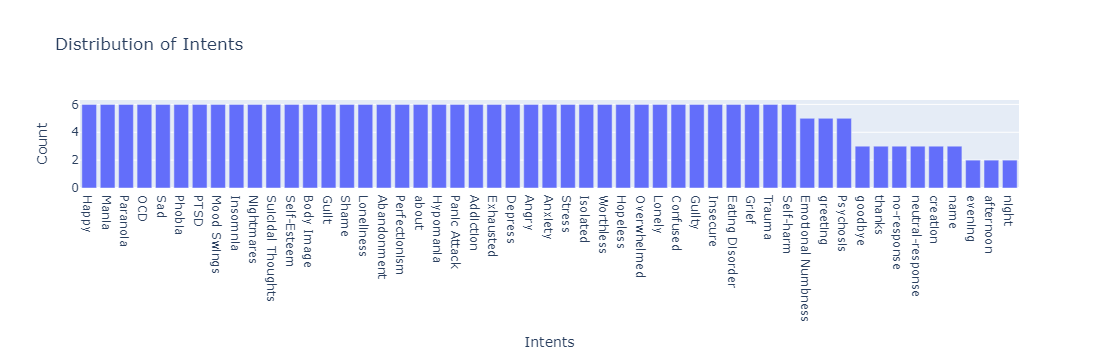

In [20]:
import plotly.graph_objects as go

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

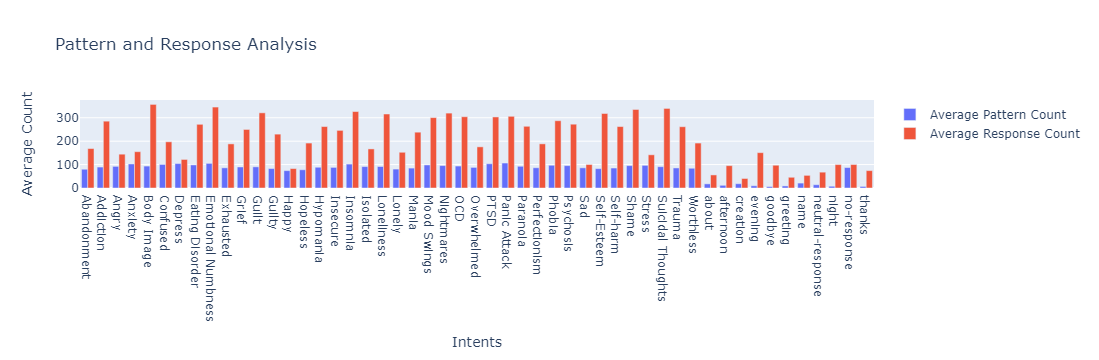

In [21]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib

# Split the dataset into training and testing sets
df['cleaned_patterns'] = df['cleaned_patterns'].apply(lambda x: str(x))
X = df['cleaned_patterns']
y = df['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



### Evaluation Performance

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



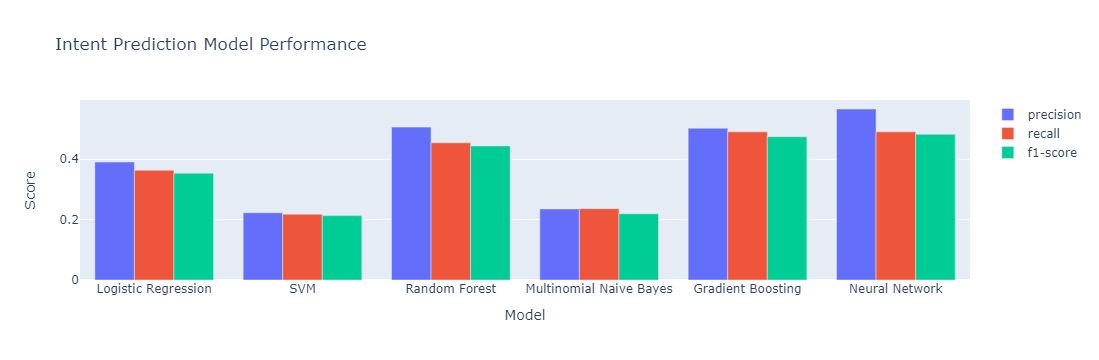

In [23]:
# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=200)
}

# Dictionary to store performance metrics for each model
models_performance = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_vec, y_train)
    
    # Predict intents for the testing set
    y_pred = model.predict(X_test_vec)
    
    # Evaluate the model's performance
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Obtain the evaluation metric values
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Store the evaluation metric values in the models_performance dictionary
    models_performance[model_name] = {'precision': precision, 'recall': recall, 'f1-score': f1_score}

# Visualize the performance of each model using a Plotly bar plot
fig = go.Figure()

evaluation_metrics = ['precision', 'recall', 'f1-score']

for metric in evaluation_metrics:
    fig.add_trace(go.Bar(name=metric, x=list(models_performance.keys()), y=[models_performance[model_name][metric] for model_name in models_performance]))

fig.update_layout(
    title='Intent Prediction Model Performance',
    xaxis_title='Model',
    yaxis_title='Score',
    barmode='group'
)

fig.show()

### Neural Network

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



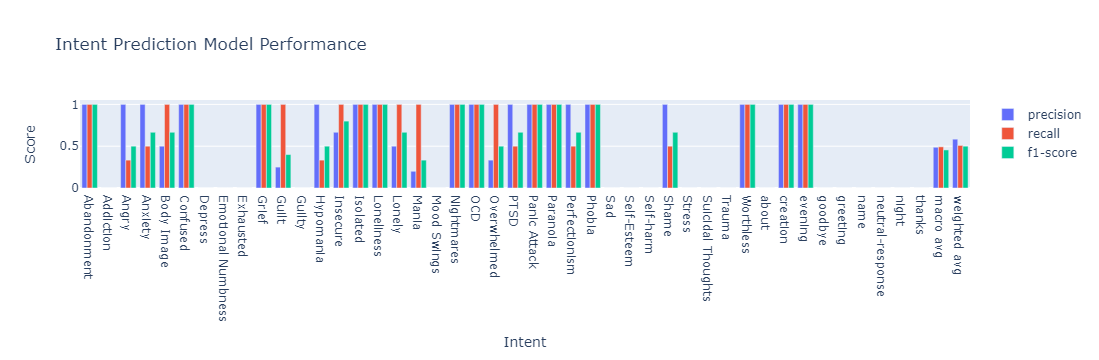

In [24]:
# Train a Multi-layer Perceptron (MLP) classifier
model = MLPClassifier(max_iter=200)
model.fit(X_train_vec, y_train)

# Predict intents for the testing set
y_pred = model.predict(X_test_vec)

joblib.dump(model, 'intent_detection_model.joblib')

# Evaluate the model's performance
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert float values in the report to dictionaries
report = {label: {metric: report[label][metric] for metric in report[label]} for label in report if isinstance(report[label], dict)}

# Extract evaluation metrics
labels = list(report.keys())
evaluation_metrics = ['precision', 'recall', 'f1-score']
metric_scores = {metric: [report[label][metric] for label in labels if label in report] for metric in evaluation_metrics}

# Visualize the model's performance using a Plotly bar plot
fig = go.Figure()
for metric in evaluation_metrics:
    fig.add_trace(go.Bar(name=metric, x=labels, y=metric_scores[metric]))

fig.update_layout(title='Intent Prediction Model Performance',
                  xaxis_title='Intent',
                  yaxis_title='Score',
                  barmode='group')

fig.show()

<Axes: title={'center': 'Top 20 unigrams in patterns'}, xlabel='Pattern'>

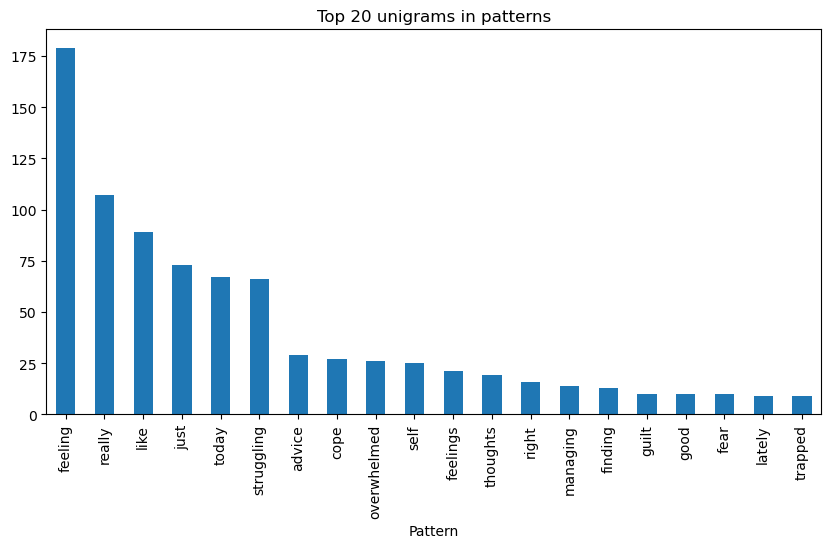

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def top_n_ngram(corpus, n = None, ngram =1):
    #initializes a CountVectorize object for converting a collection of text documents in to a matrix a
    #it tokenizes the text, removes English stop wors, and considers n-grams in the specified range.
    vec = CountVectorizer(stop_words = 'english', ngram_range=(ngram, ngram)).fit(corpus)
    
    #transforms the input corpus into a "bag of words" representation using the previously fitted Count
    #each row in bag_of_words corresponsds to a documet in the corpus, and each column represents a 
    
    bag_of_words = vec.transform(corpus)
    
    #Calculates the count of all the word in the whole review
    sum_words = bag_of_words.sum(axis = 0)
    
    #Creates a list of tuples where each tuple contains a word (or n-gram) and its corresponding frequent
    #The information is extracted from the vocubulary created by the CountVectorizer.
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
    return words_freq[:n]

common_words = top_n_ngram( df['patterns'], 20, 1)
data = pd.DataFrame(common_words, columns = ['Pattern', 'count'])
plt.figure(figsize = (10, 5))
data.groupby('Pattern').sum()['count'].sort_values(ascending=False).plot(kind='bar', title='Top 20 unigrams in patterns')

In [ ]:
def process_input(user_input):
    # Check if user input is empty
    if not user_input.strip():
        # If input is empty, assume the tag as "non-response"
        return [], [], [], [], [], "no-response"

    # Tokenize input into sentences and words
    sentences = sent_tokenize(user_input)
    words = word_tokenize(user_input)

    # Remove stop words and perform lemmatization
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words]

    # Remove punctuation and preserve original casing
    filtered_words = [word for word in words if word.isalnum()]

    # Perform POS tagging
    pos_tags = pos_tag(filtered_words)
    
    # Perform NER
    ner_tags = ne_chunk(pos_tags)
    
    # Check if filtered words are empty after processing
    if not filtered_words:
        # If all words are filtered out, assume the tag as "non-response"
        return [], [], [], [], [], "no-response"

    # Load the trained model
    model = joblib.load('intent_detection_model.joblib')
    
    # Vectorize the user input
    user_input_vec = vectorizer.transform([' '.join(word for word, _ in pos_tags)])

    # Predict the intent
    intent = model.predict(user_input_vec)[0]

    return sentences, words, pos_tags, filtered_words, ner_tags, intent

def get_name():
    name = input("What is your name: ")
    return name
    
def get_response(tag):
    matching_responses = df.loc[df['tag'] == tag, 'responses'].tolist()
    selected_response = np.random.choice(matching_responses)
    return selected_response

def update_user_input(tag, user_input):
    # Read the Excel file
    df = pd.read_excel(path)

    # Find the row corresponding to the tag
    tag_row = df[df['Tag'] == tag]

    # Append user input to the existing patterns for the tag
    if not tag_row.empty:
        current_patterns = tag_row.iloc[0]['Patterns']
        current_patterns = [pattern.strip("[]").strip("'") for pattern in current_patterns.split("], [")]

        # Append the user input as a new pattern
        current_patterns.append("'" + user_input + "'")

        # Convert the updated patterns back to the original format
        updated_patterns = ", ".join("['" + pattern + "']" for pattern in current_patterns)

        # Update the DataFrame with the new patterns
        df.loc[df['Tag'] == tag, 'Patterns'] =  updated_patterns

        # Save the updated DataFrame to Excel
        df.to_excel(path, index=False)
        print("User input added to patterns column for tag:", tag)
    else:
        print("Tag not found in the Excel file.")


print("I'm HahaHelper, your Personal Therapeutic AI Assistant designed to give advice regarding mental health ! Let's start by telling me your name.")
name = get_name()
previous_interactions = []
interaction_counter = 1  # Initialize a counter for interactions

print('How can I assist you today, ', name)
while True:
    # Get user input
    user_input = input("User:")
    # Add the user input to the list of previous interactions
    previous_interactions.append(("User", user_input, interaction_counter))
    
    # Predict intent
    sentences, words, pos_tags, lemmatize_tags, ner_tags, intent = process_input(user_input)

    # Print predicted intent and response
    print('-------Preprocessing Text-------')
    print('Sentences', sentences)
    print('Words', words)
    print('Pos Tag:', pos_tags)
    print('Lemmatization:', lemmatize_tags)
    print('Ner Tag:', ner_tags)
    print('--------------------------------')

    print('--------Predict Intent----------')
    print('Predicted Intent:', intent)
    if intent == "goodbye":
        response = get_response(intent)
        print('Bot:', name, ',',response)
        break
    else:
        response = get_response(intent)
        print('Bot:', response)
        update_user_input(intent, user_input)
    # Add bot response to the list of previous interactions
    previous_interactions.append(("Bot", response, interaction_counter))
    
    # Increment interaction counter for the next interaction
    interaction_counter += 1  
    print('--------------------------------')
    # Store Previous User Input and Bot Response
    print('------------History--------------')
    print("Previous Interactions:")
    for role, text, interaction_number in previous_interactions:
        print(f"{interaction_number}. {role}: {text}")
    print('-----------------------------')



I'm HahaHelper, your Personal Therapeutic AI Assistant designed to give advice regarding mental health ! Let's start by telling me your name.
